Tugas 1: Multiple Linear Regression
1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.


Catatan Tambahan:
1. Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.
2. Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.
3. Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.



In [109]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [110]:
data = pd.read_csv('../data/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [111]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


data insurace.csv memiliki 7 kolom, tetapi hanya 4 kolom saja yang bertipe numerik dan sisanya bertipe data non nunmerik.

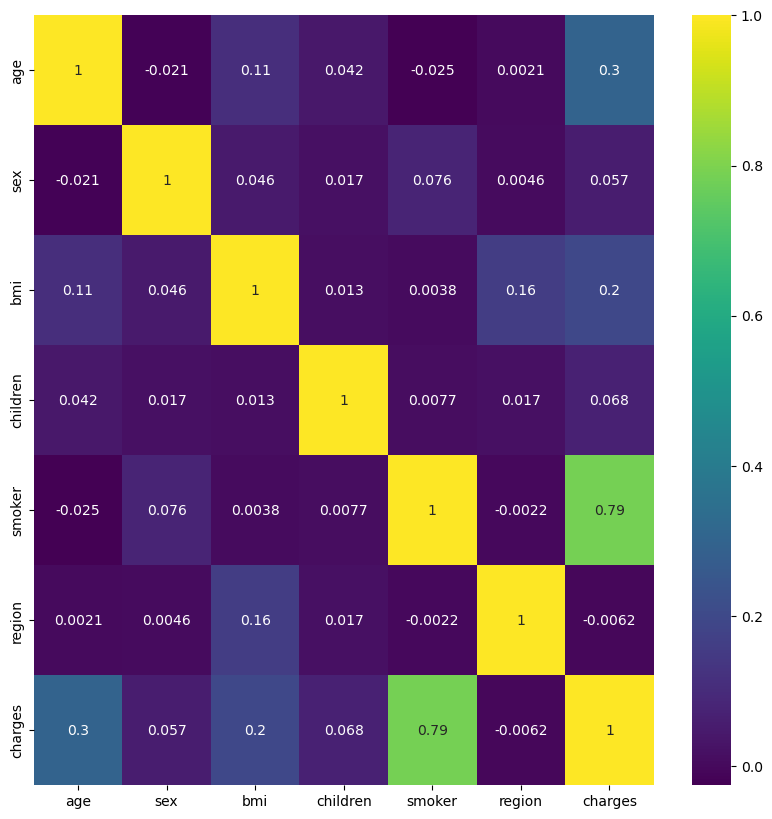

In [112]:
#encoder data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])


#Mencari relevansi antar variabel
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, cmap='viridis')
plt.show()

#berdasarkan heatmap, variabel yang memiliki korelasi tinggi dengan charges adalah smoker dan bmi

<Figure size 1000x1000 with 0 Axes>

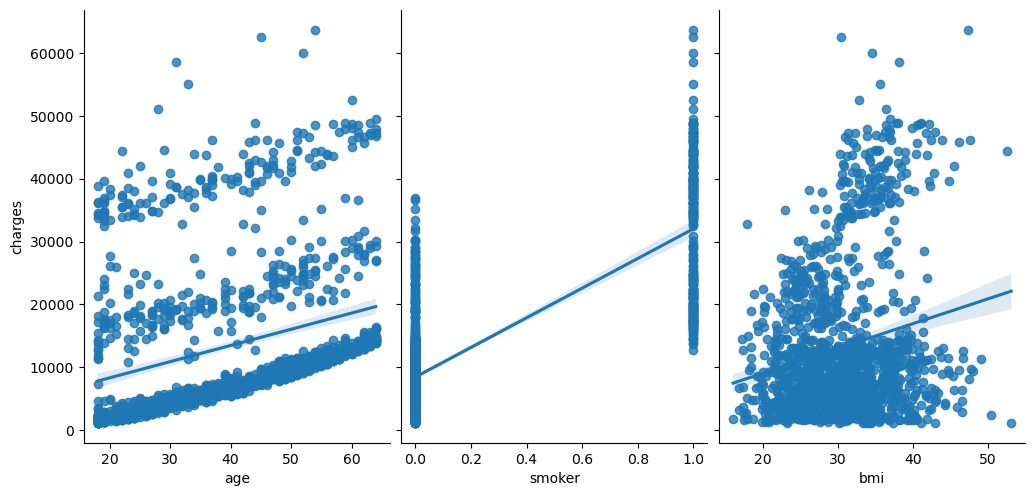

In [113]:
#persebaran fitur terhadap target
plt.figure(figsize=(10,10))

sns.pairplot(data,x_vars=['age','smoker','bmi'], y_vars='charges', height=5, aspect=0.7, kind='reg')
plt.show()

In [114]:
#membagi data menjadi data train dan data test
x = data[['age','smoker','bmi']]
y = data['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8 ,test_size=0.2, random_state=0)

In [115]:
# multiple linear regression
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)
mlr.predict(x_test)
print('Intercept: \n', mlr.intercept_)
print('Coefficients: \n', mlr.coef_) 



Intercept: 
 -11571.908016839823
Coefficients: 
 [  257.04066602 23625.23448834   321.83997719]


In [116]:
#multiple linear regression dengan statsmodels
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

p_model=(lr.summary())
print(p_model)


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     981.8
Date:                Mon, 18 Sep 2023   Prob (F-statistic):          3.90e-306
Time:                        22:52:12   Log-Likelihood:                -10857.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1066   BIC:                         2.174e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.157e+04   1055.832    -10.960      0.0

In [117]:
#prediksi pada data uji
y_pred = mlr.predict(x_test)
# print(y_pred)
#visualisasi hasil prediksi
mlr_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
mlr_pred

,Actual,Predicted
578,9724.53000,11513.773927
610,8547.69130,9961.443416
569,45702.02235,37446.717115
1034,12950.07120,16459.790935
198,9644.25250,7346.377538
...,...,...
1084,15019.76005,14179.123381
726,6664.68595,8108.623842
1132,20709.02034,16043.124227
725,40932.42950,32332.397561


In [118]:
#menghitung mae, mse, rmse dan r-squared
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared:', metrics.r2_score(y_test,y_pred))


Mean Absolute Error: 3960.866619808712
Mean Squared Error: 32693237.938726168
Root Mean Squared Error: 5717.80009607945
R-Squared: 0.7945500805653087


In [119]:
#fitur scaling svr
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
y_scaler = sc.fit_transform(y_train.values.reshape(-1,1))
y_test = sc.transform(y_test.values.reshape(-1,1))



c:\Users\asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


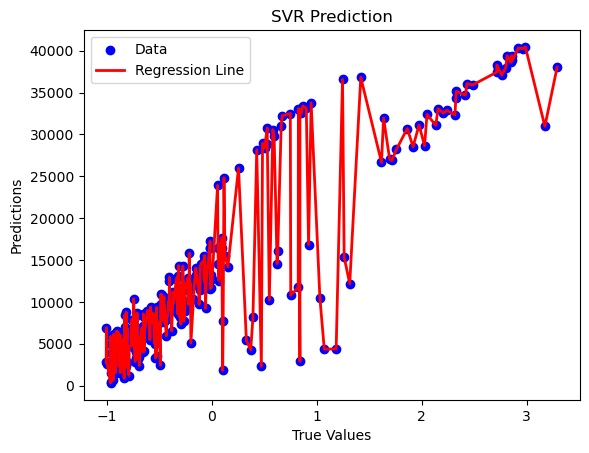

In [124]:
import matplotlib.pyplot as plt  # Add this import statement
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Scaling the data
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)
y_scaler = sc.fit_transform(y_train.values.reshape(-1, 1))
# y_test = sc.transform(y_test.values.reshape(-1, 1))

# SVR Model
regressor = SVR(kernel='rbf')
regressor.fit(x_train_scaled, y_scaler)

# Predictions
# y_pred_scaled = regressor.predict(x_test_scaled)
# y_pred = sc.inverse_transform(y_pred_scaled)

# Plotting the scatter plot
plt.scatter(y_test, y_pred, color='blue', label='Data')
plt.title('SVR Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')

# Adding a regression line
sort_axis = np.argsort(y_test.flatten())
plt.plot(y_test[sort_axis], y_pred[sort_axis], color='red', linewidth=2, label='Regression Line')

plt.legend()
plt.show()


In [ ]:
#menghitung mae, mse, rmse dan r-squared
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-Squared:', r2_score(y_test,y_pred))

Mean Absolute Error: 0.17057522757545082
Mean Squared Error: 0.12238559559378168
Root Mean Squared Error: 0.3498365269576373
R-Squared: 0.8897382274816779
